# < 15. 문자를 읽을 수 있는 딥러닝 >

## 학습 목차
1. 들어가며
2. 기계가 읽을 수 있나요?
3. 어떤 과정으로 읽을까요?
4. 딥러닝 문자인식의 시작
5. 사진 속 문자 찾아내기 - detection
6. 사진 속 문자 읽어내기 - recognition
7. keras-ocr 써보기
8. 테서랙트 써보기
9. 프로젝트 : 다양한 OCR 모델 비교하기

---

## 15.3 어떤 과정으로 읽을까요?

문자 모델은 모통 두 단계로 이뤄집니다.

먼저 입력받은 사진 속에서 문자의 위치를 찾아냅니다. 이 과정을 <mark>Text Detection(문자검출)</mark> 이라고 합니다. 찾은 문자 영역으로부터 문자를 읽어내는 것은 <mark>Text Recognition(문자인식)</mark> 입니다. 예를 들어 아래 카카오의 OCR 모델은 먼저 문자가 있는 영역의 정보 (coord, Text Recognition)를 찾아내고, 각 영역에서 문자를 인식하고 있습니다. 이렇게 문자 인식 모델은 Text Detection과 Recognition 두 과정을 통해서 사진 속의 문자를 읽을 수 있게 됩니다.

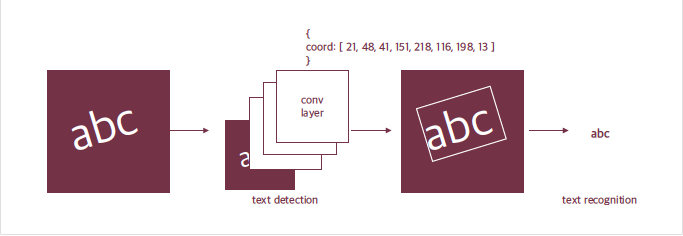

---

## 15.4 딥러닝 문자인식의 시작

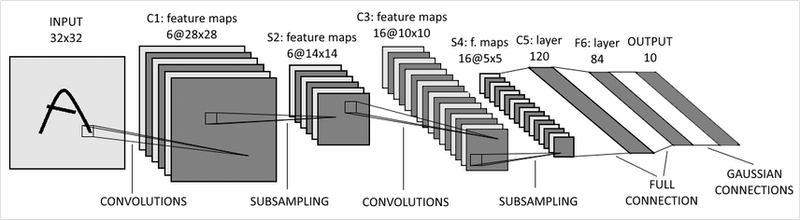

MNIST가 딥러닝 데이터셋의 "hello, world!"라면, LeNet은 CNN의 "hello, world!"라 할 수 있습니다. 1998년에 발표된 LeNet은 우편번호나 손글씨를 읽기 위해서 만들어졌습니다. 앞서 학습한 MNIST로 LeNet을 훈련시킨다면 우편번호를 읽을 수 있는 것이지요. 위 그림은 LeNet-5의 구조입니다. 요즘 나온 모델들을 생각한다면 구조가 상당히 간단하지요? Convolution 레이어와 최종 출력 레이어로 이뤄져 있습니다.

하지만 이렇게 단순한 분류 모델만으로는 우리가 위에서 구글 API로 테스트해 보았던 복잡한 결과를 얻을 수 없습니다. 넓고 복잡한 이미지에서 글자 영역을 찾을 수 없을뿐더러 글자를 영역별로 잘라서 넣더라도 우리가 인식하기를 원하는 사진은 여러 글자가 모여있기 때문에 단순한 분류 문제로 표현이 불가능하지요.

---

## 15.5 사진 속 문자 찾아내기 - detection

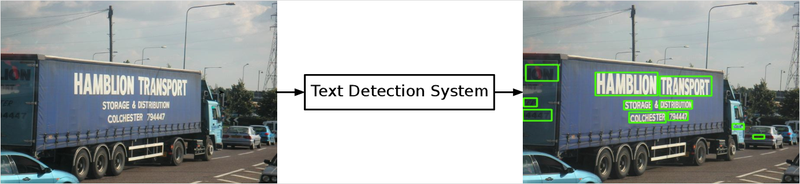

사진 속 문자를 찾아내는 최근의 딥러닝 모델은 일반적인 Object Detection(객체 인식) 방법으로 접근합니다. 이미지 속에서 물체를 찾아내는 딥러닝 모델에게 문자를 찾도록 학습을 시킨 것이죠. 물론 문자의 특성에 따라서 모델을 변경해 주기도 합니다.

딥러닝 기반 객체 검출 방법에는 <mark>Regression(회귀) 방식</mark>이나 <mark>Segmentation(세그멘테이션) 방식</mark>이 있습니다. Regression은 기준으로 하는 박스 대비 문자의 박스가 얼마나 차이가 나는지를 학습합니다. Segmentation은 픽셀 단위로 해당 픽셀이 문자를 표현하는지를 분류하는 문제(pixel-wise classification)라고 볼 수 있습니다.

문자는 일반적인 객체와 다른 특성을 가진다 <br>
    - 일반적인 객체는 물체에 따라서 크기가 일정한 특징을 가집니다. 하지만 문자는 영역과 배치가 자유로워 문자를 검출하기 위한 설정이 필요합니다. <br>
    - 또한 객체는 물체 간 거리가 충분히 확보되는 데에 반해 글자는 매우 촘촘하게 배치되어 있습니다.
    
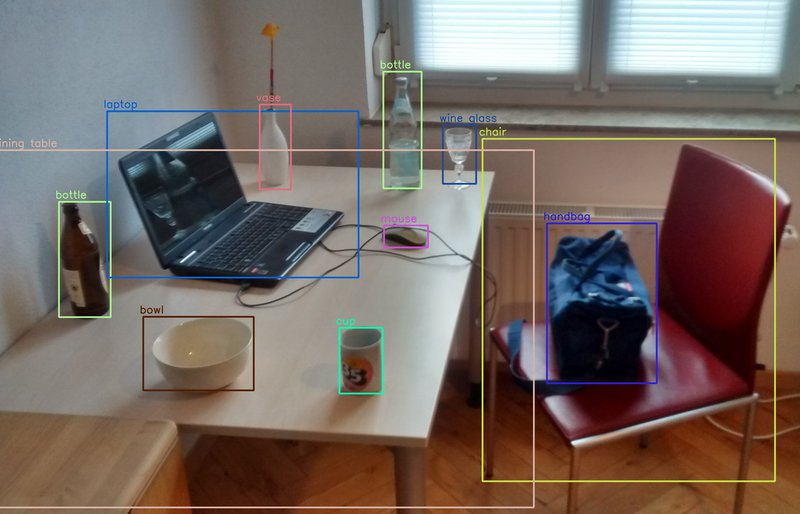
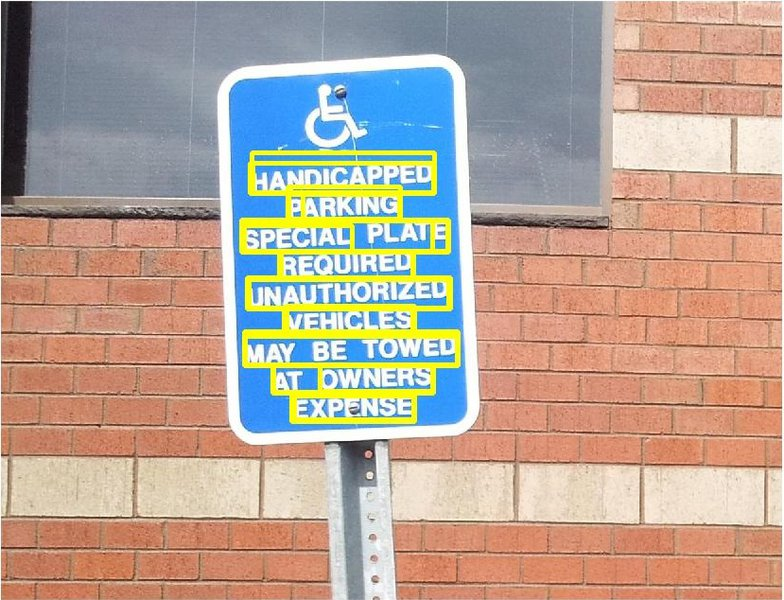

---

## 15.6 사진 속 문자 읽어내기 - recognition

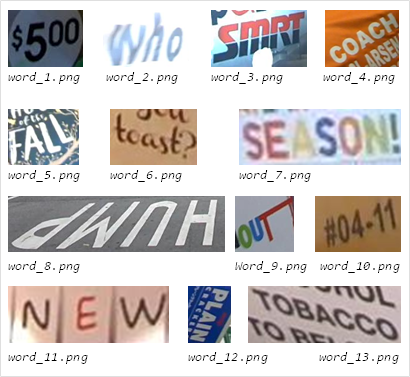

문자 인식은 사진 속에서 문자를 검출해 내는 검출 모델이 영역을 잘라서 주면 그 영역에 어떤 글자가 포함되어 있는지 읽어내는 과정입니다. 아래는 ICDAR15라는 OCR 데이터셋에서 단어 단위로 잘린 이미지입니다. 문자 인식 모델은 이렇게 작게 잘린 이미지가 들어오면 이미지 속에 어떤 단어가 포함됐는지 찾아내지요.

사실 이 과정은 이미지 문제보다는 자연어 처리에서 많은 영감을 받았습니다. 자연어 처리를 한다면 RNN이 떠오르실 텐데요. 이미지 내의 문자 인식 모델의 기본적인 방법 중 하나가 바로 CNN과 RNN을 결합한 CRNN 모델입니다. 이미지 내의 텍스트와 연관된 특징을 CNN을 통해 추출한 후에 스텝 단위의 문자 정보를 RNN으로 인식하는 것이지요.

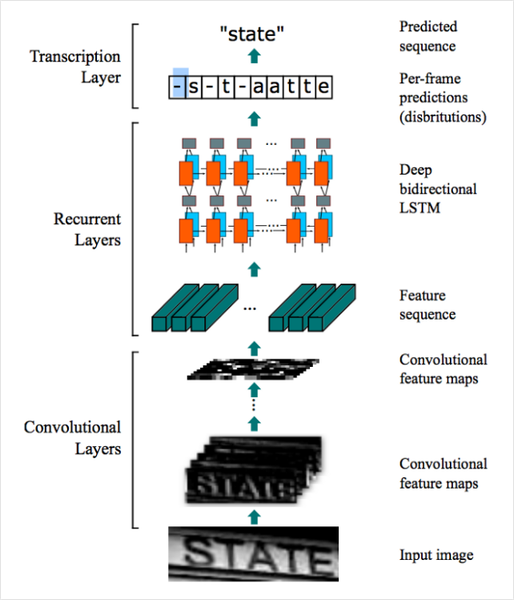

---

## 15.7 keras-ocr 써보기

`keras-ocr`은 텐서플로우의 케라스 API를 기반으로 이미지 속 문자를 읽는 `End-to-End OCR`을 할 수 있게 해줍니다. 공식 문서에도 나와 있듯, 검출 모델로는 네이버 데뷰 2018 영상에서 소개한 CRAFT(Character Region Awareness for Text Detection)를 사용하고, 인식 모델로는 앞에서 설명한 CRNN을 사용합니다.

필요한 라이브러리인 `keras_ocr` 과 인식 결과의 시각화를 위한 `matplotlib.pyplot` 를 불러옵니다. `keras_ocr.pipeline.Pipeline()` 는 인식을 위한 파이프라인을 생성하는데 이때 초기화 과정에서 미리 학습된 모델의 가중치(weight)를 불러오게 됩니다. 검출기와 인식기를 위한 가중치 하나씩을 불러오겠지요.

In [1]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [2]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = [
  'https://source.unsplash.com/M7mu6jXlcns/640x460',
  'https://source.unsplash.com/6jsp4iHc8hI/640x460',
  'https://source.unsplash.com/98uYQ-KupiE',
  'https://source.unsplash.com/j9JoYpaJH3A',
  'https://source.unsplash.com/eBkEJ9cH5b4'
]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

이제 인식된 결과를 pyplot으로 시각화를 해봅니다.

사용이 매우 간단합니다! 내부적으로 `recognize()` 는 검출기와 인식기를 두고, 검출기로 바운딩 박스(bounding box, 문자가 있는 영역을 표시한 정보)를 검출한 뒤, 인식기가 각 박스로부터 문자를 인식하는 과정을 거치도록 합니다.

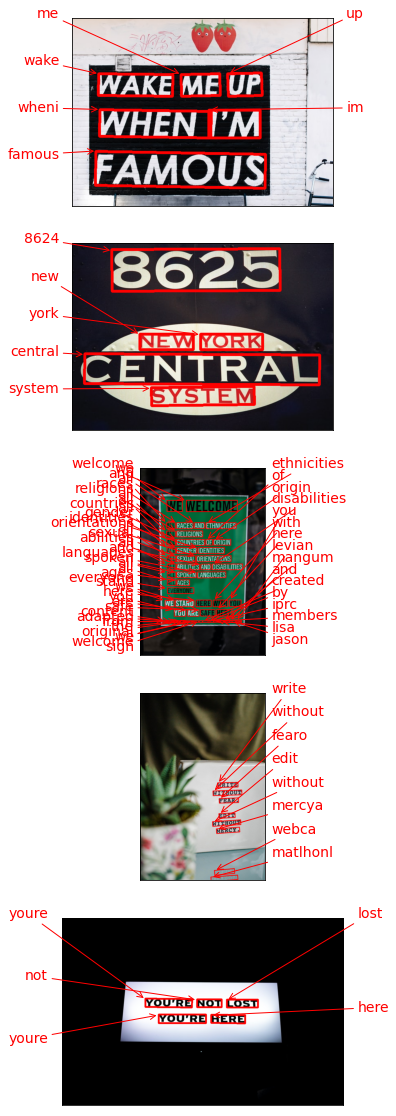

In [3]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

---

## 15.8 테서랙트 써보기

이번에는 테서랙트(Tesseract) 라이브러리로 이미지에서 문자를 인식해 보겠습니다. 테서랙트는 구글에서 후원하는 OCR 오픈소스 라이브러리로 현재는 버전 4와 Tesseract.js등으로 확장되는 등 많은 곳에서 사용되고 있습니다. 버전 4에서는 LSTM이 엔진에 추가되었고 현재 한국어를 포함한 116 개 국어를 지원하고 있습니다.

오픈소스라는 점은 여러분들이 원하는 프로젝트에 활용하기 쉽다는 것을 뜻하니, 직접 해 보면서 익혀두면 나중에 간단한 OCR 모델이 필요할 때 빠르게 활용할 수 있을 겁니다.

### 테서랙트로 문자 검출하고 이미지 자르기(detection)

In [5]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/test_image.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png


위에서 구현한 `crop_word_regions() 함수`는 여러분이 선택한 테스트 이미지를 받아서, 문자 검출을 진행한 후, 검출된 문자 영역을 crop한 이미지로 만들어 그 파일들의 list를 리턴하는 함수입니다.

기본적으로`pytesseract.image_to_data() `를 사용합니다. 파이썬에서 편하게 사용하기 위해서 `pytesseract` 의 `Output` 을 사용해서 결괏값의 형식을 딕셔너리(DICT) 형식으로 설정해 주게 됩니다. 이렇게 인식된 결과는 바운딩 박스의 left, top, width, height 정보를 가지게 됩니다. 바운딩 박스를 사용해 이미지의 문자 영역들을 파이썬 `PIL(pillow)` 또는 `opencv` 라이브러리를 사용해 잘라(crop)서 `cropped_image_path_list`에 담아 리턴하였습니다.

### 테서랙트로 잘린 이미지에서 단어 인식하기

In [6]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

a

AUTHORIZED

&

PERSONNEL

ONLY

On

Done
